In [8]:
import csv
import pandas as pd
df = pd.read_csv('data_clean.csv')
df

,Unnamed: 0,ID,Start_Time,Severity,Start_Lat,Start_Lng,Zipcode,Temperature(F),Humidity(%),Visibility(mi),...,Thunder and Hail,Thunder and Hail / Windy,Thunder in the Vicinity,Thunderstorm,Thunderstorms and Rain,Tornado,Volcanic Ash,Widespread Dust,Wintry Mix,Wintry Mix / Windy
0,0,A-2716600,2016-02-08 00:37:08,3,40.10891,-83.09286,43017.0,42.1,58.0,10.0,...,0,0,0,0,0,0,0,0,0,0
1,1,A-2716601,2016-02-08 05:56:20,2,39.86542,-84.06280,45424.0,36.9,91.0,10.0,...,0,0,0,0,0,0,0,0,0,0
2,2,A-2716602,2016-02-08 06:15:39,2,39.10266,-84.52468,45203.0,36.0,97.0,10.0,...,0,0,0,0,0,0,0,0,0,0
3,3,A-2716603,2016-02-08 06:15:39,2,39.10148,-84.52341,45202.0,36.0,97.0,10.0,...,0,0,0,0,0,0,0,0,0,0
4,4,A-2716604,2016-02-08 06:51:45,2,41.06213,-81.53784,44311.0,39.0,55.0,10.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,1516059,A-4239402,2019-08-23 18:03:25,2,34.00248,-117.37936,92501.0,86.0,40.0,10.0,...,0,0,0,0,0,0,0,0,0,0
1516060,1516060,A-4239403,2019-08-23 19:11:30,2,32.76696,-117.14806,92108.0,70.0,73.0,10.0,...,0,0,0,0,0,0,0,0,0,0
1516061,1516061,A-4239404,2019-08-23 19:00:21,2,33.77545,-117.84779,92866.0,73.0,64.0,10.0,...,0,0,0,0,0,0,0,0,0,0
1516062,1516062,A-4239405,2019-08-23 19:00:21,2,33.99246,-118.40302,90230.0,71.0,81.0,10.0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df1= df.drop('Unnamed: 0', axis=1)
df1= df1.drop('ID', axis=1)
df1= df1.drop('Start_Time', axis=1)
df1 = df1.dropna()
dataTypeSeries = df1.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries)

Data type of each column of Dataframe :
Severity                int64
Start_Lat             float64
Start_Lng             float64
Zipcode               float64
Temperature(F)        float64
                       ...   
Tornado                 int64
Volcanic Ash            int64
Widespread Dust         int64
Wintry Mix              int64
Wintry Mix / Windy      int64
Length: 137, dtype: object


In [18]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(df1)
x

array([[ 1.2512807 ,  0.61783758,  0.84207562, ..., -0.0054228 ,
        -0.02921471, -0.00452948],
       [-0.39190199,  0.57087325,  0.78959895, ..., -0.0054228 ,
        -0.02921471, -0.00452948],
       [-0.39190199,  0.42375217,  0.76460985, ..., -0.0054228 ,
        -0.02921471, -0.00452948],
       ...,
       [-0.39190199, -0.60375961, -1.0382708 , ..., -0.0054228 ,
        -0.02921471, -0.00452948],
       [-0.39190199, -0.56190274, -1.06831042, ..., -0.0054228 ,
        -0.02921471, -0.00452948],
       [-0.39190199, -0.53461602, -1.00489627, ..., -0.0054228 ,
        -0.02921471, -0.00452948]])

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-0.279303,-1.838141
1,-0.276875,-2.367054
2,-0.304360,-2.300066
3,-0.304361,-2.300056
4,-0.280120,-1.523217
...,...,...
1462286,-0.236657,2.539142
1462287,-0.242769,1.578204
1462288,-0.262806,1.584311
1462289,-0.242859,1.395722


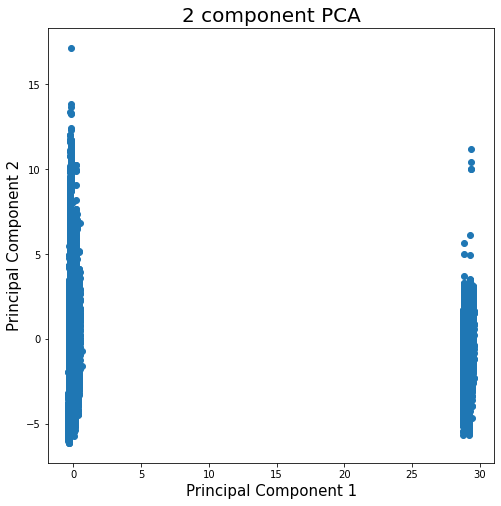

In [23]:
import matplotlib.pylab as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf['principal component 1']
               , principalDf['principal component 2'])
plt.show()